In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler


In [2]:
from google.colab import files

uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [2]:
#read csv files
credit_card_df= pd.read_csv("creditcard.csv")

credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(credit_card_df.shape)
print(credit_card_df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [4]:
credit_card_df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:

# Determine number of fraud cases in dataset
fraud = credit_card_df[credit_card_df['Class'] == 1]
valid = credit_card_df[credit_card_df['Class'] == 0]

In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

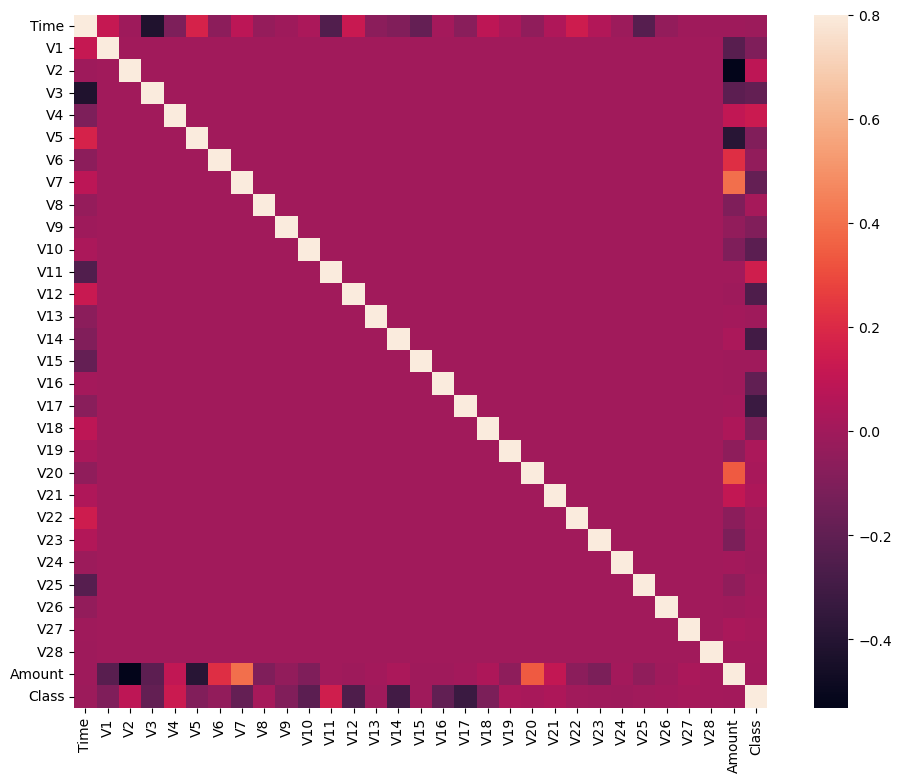

In [8]:
# Correlation matrix
corrmat = credit_card_df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [9]:
# dividing the X and the Y from the dataset
X = credit_card_df.drop(columns=['Time','Class'])
Y = credit_card_df["Class"]
print(X.shape)
print(Y.shape)


(284807, 29)
(284807,)


In [10]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        X, Y, test_size = 0.2, random_state = 42)

In [11]:
def scale_train_test(X_train,X_test):
    scaler=MinMaxScaler()
    X_train_scaled=scaler.fit_transform(X_train.to_numpy())
    X_train_scaled=pd.DataFrame(X_train_scaled, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
    X_test_scaled=scaler.transform(X_test.to_numpy())
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
    return X_train_scaled,X_test_scaled

In [12]:
X_train_scaled,X_test_scaled=scale_train_test(xTrain,xTest)

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_scaled, yTrain)
y_train_oversampled.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=1)
X_test_undersampled, y_test_undersampled=rus.fit_resample(X_test_scaled, yTest)
y_test_undersampled.value_counts()

Class
0    98
1    98
Name: count, dtype: int64

In [15]:
# Building the Random Forest Classifier (RANDOM FOREST)
# from sklearn.ensemble import RandomForestClassifier
# # random forest model creation
# rfc = RandomForestClassifier()
# rfc.fit(xTrain, yTrain)
# # predictions
# yPred = rfc.predict(xTest)

In [16]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

# n_outliers = len(fraud)
# n_errors = (yPred != yTest).sum()
# print("The model used is Random Forest classifier")

# acc = accuracy_score(yTest, yPred)
# print("The accuracy is {}".format(acc))

# prec = precision_score(yTest, yPred)
# print("The precision is {}".format(prec))

# rec = recall_score(yTest, yPred)
# print("The recall is {}".format(rec))

# f1 = f1_score(yTest, yPred)
# print("The F1-Score is {}".format(f1))

# MCC = matthews_corrcoef(yTest, yPred)
# print("The Matthews correlation coefficient is{}".format(MCC))

In [17]:
# printing the confusion matrix
# LABELS = ['Normal', 'Fraud']
# conf_matrix = confusion_matrix(yTest, yPred)
# plt.figure(figsize =(12, 12))
# sns.heatmap(conf_matrix, xticklabels = LABELS,
#             yticklabels = LABELS, annot = True, fmt ="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show()

In [18]:
# first, initialize the classificators
#tree= DecisionTreeClassifier(random_state=24)
# using the random state for reproducibility
forest= RandomForestClassifier(random_state=24,max_depth=4)
knn= KNeighborsClassifier()
svm= SVC(random_state=24)
#xboost= XGBClassifier(random_state=24)
#logistic=LogisticRegression(solver='lbfgs', max_iter=1000 )
#gradient=GradientBoostingClassifier(random_state=24)
#adaboost = AdaBoostClassifier(random_state=24)
#linear =LinearRegression()


In [19]:
# now, create a list with the objects
#models= [tree, forest, knn, svm, xboost, logistic, gradient,adaboost]
models= [forest, knn, svm]

In [20]:
depth_range=range(1,20)
for depth in depth_range:
    model=RandomForestClassifier(random_state=24,max_depth=depth)
    model.fit(X_train_oversampled, y_train_oversampled)
    y_pred= model.predict(X_test_undersampled)
    clf_report= classification_report(y_test_undersampled, y_pred)
    print(f"RFC with {depth} max depth")
    print(f"The training score is {model.score(X_train_oversampled,y_train_oversampled)}")
    print(f"The testing score is {model.score(X_test_undersampled,y_test_undersampled)}")
    print(clf_report)
    print("\n")

RFC with 1 max depth
The training score is 0.9184879380613846
The testing score is 0.9387755102040817
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        98
           1       1.00      0.88      0.93        98

    accuracy                           0.94       196
   macro avg       0.95      0.94      0.94       196
weighted avg       0.95      0.94      0.94       196



RFC with 2 max depth
The training score is 0.9259027219049377
The testing score is 0.9387755102040817
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        98
           1       0.99      0.89      0.94        98

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196



RFC with 3 max depth
The training score is 0.935416859015788
The testing score is 0.9336734693877551
              precision    recall  f1

k_range=range(1,12,2)
for k in k_range:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_oversampled, y_train_oversampled)
  y_pred= model.predict(X_test_undersampled)
  clf_report= classification_report(y_test_undersampled, y_pred)
  print(f"KNN with {k} neighbors")
  print(f"The training score is {model.score(X_train_oversampled,y_train_oversampled)}")
  print(f"The testing score is {model.score(X_test_undersampled,y_test_undersampled)}")
  print(clf_report)
  print("\n")


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an SVC classifier
svc = SVC(kernel='rbf')

from sklearn.metrics import make_scorer, accuracy_score, recall_score

# Grid search with cross-validation for accuracy
grid_search_acc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_acc.fit(X_train_oversampled, y_train_oversampled)

# Grid search with cross-validation for recall
scorer_recall = make_scorer(recall_score, average='weighted')
grid_search_recall = GridSearchCV(svc, param_grid, cv=5, scoring=scorer_recall)
grid_search_recall.fit(X_train_oversampled, y_train_oversampled)

# Print the best parameters and best score for accuracy
print("Best Parameters for Accuracy: ", grid_search_acc.best_params_)
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search_acc.best_score_))

# Print the best parameters and best score for recall
print("Best Parameters for Recall: ", grid_search_recall.best_params_)
print("Best Cross-validation Recall: {:.2f}".format(grid_search_recall.best_score_))

# Evaluate the model on the test set for accuracy
test_score_acc = grid_search_acc.score(X_test_undersampled, y_test_undersampled)
print("Test Accuracy: {:.2f}".format(test_score_acc))

# Evaluate the model on the test set for recall
y_pred_test = grid_search_recall.predict(X_test_undersampled)
test_score_recall = recall_score(y_test_undersampled, y_pred_test, average='weighted')
print("Test Recall: {:.2f}".format(test_score_recall))
print('\n')

The accuracy of model RandomForestClassifier is 0.9996137776061234
The training score is 1.0
The testing score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



{'RandomForestClassifier'}


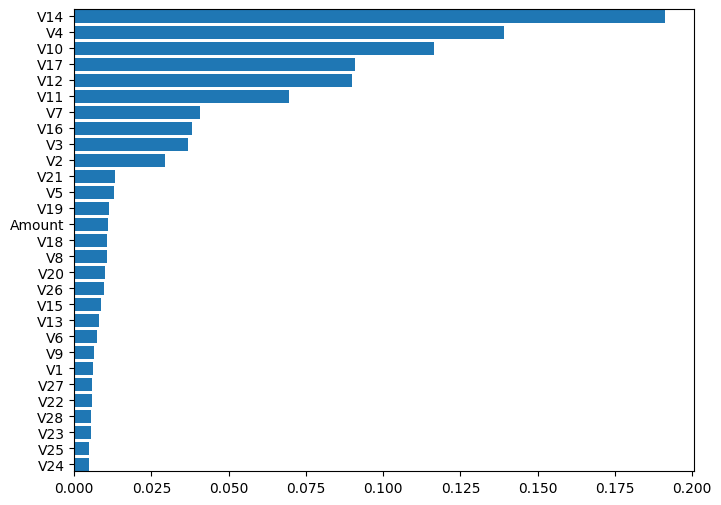

The accuracy of model KNeighborsClassifier is 0.9991573329588147
The training score is 0.9997581896760181
The testing score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



The accuracy of model SVC is 0.981882658614515
The training score is 0.960868494752716
The testing score is 1.0
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.92      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962





In [20]:
for model in models:
    # fit the model
    model.fit(X_train_oversampled, y_train_oversampled)
    #predict on the test set
    y_pred= model.predict(X_test_undersampled)
    #this gives us how often the algorithm predicted correctly
    accuracy= accuracy_score(y_test_undersampled, y_pred)
    # witht the report, we have a bigger picture, with precisions and recall for each class.
    clf_report= classification_report(y_test_undersampled, y_pred)
  # print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(f"The accuracy of model {type(model).__name__} is {accuracy}")
    print(f"The training score is {model.score(X_train_oversampled,y_train_oversampled)}")
    print(f"The testing score is {model.score(X_test_undersampled,y_pred)}")

    print(clf_report)
    print("\n")

    #if ((model == tree) or (model == forest) or (model == xboost) or (model == gradient)  or (model == adaboost)):
    if ((model == forest)):
      print({type(model).__name__})
      # Get the feature importance array
      feature_importances = model.feature_importances_
      importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
      importances_sorted[:10]
      # Plot the feature importances
      features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
      cols = [f[0] for f in features]
      width = [f[1] for f in features]

      fig, ax = plt.subplots()

      fig.set_size_inches(8,6)
      plt.margins(y=0.001)

      ax.barh(y=cols, width=width)

      plt.show()


In [ ]:
# 3 model test, scaled test, oversampled train, no undersample test

# The accuracy of model RandomForestClassifier is 0.9996137776061234
# The training score is 1.0
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.97      0.80      0.88        98

#     accuracy                           1.00     56962
#    macro avg       0.99      0.90      0.94     56962
# weighted avg       1.00      1.00      1.00     56962



# {'RandomForestClassifier'}

# The accuracy of model KNeighborsClassifier is 0.9991573329588147
# The training score is 0.9997581896760181
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.72      0.84      0.77        98

#     accuracy                           1.00     56962
#    macro avg       0.86      0.92      0.89     56962
# weighted avg       1.00      1.00      1.00     56962



# The accuracy of model SVC is 0.981882658614515
# The training score is 0.960868494752716
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      0.98      0.99     56864
#            1       0.08      0.92      0.15        98

#     accuracy                           0.98     56962
#    macro avg       0.54      0.95      0.57     56962
# weighted avg       1.00      0.98      0.99     56962

In [ ]:
# KNN loop testing best # neighbors w/ scaled X test, no undersampling
#
# KNN with 1 neighbors
# The training score is 1.0
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.84      0.74      0.79        98

#     accuracy                           1.00     56962
#    macro avg       0.92      0.87      0.89     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 3 neighbors
# The training score is 0.9998812931136817
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.76      0.83      0.79        98

#     accuracy                           1.00     56962
#    macro avg       0.88      0.91      0.90     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 5 neighbors
# The training score is 0.9997581896760181
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.72      0.84      0.77        98

#     accuracy                           1.00     56962
#    macro avg       0.86      0.92      0.89     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 7 neighbors
# The training score is 0.9996504741680625
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.65      0.85      0.74        98

#     accuracy                           1.00     56962
#    macro avg       0.83      0.92      0.87     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 9 neighbors
# The training score is 0.9995493534871247
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.64      0.86      0.73        98

#     accuracy                           1.00     56962
#    macro avg       0.82      0.93      0.86     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 11 neighbors
# The training score is 0.9994636207358948
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.60      0.86      0.71        98

#     accuracy                           1.00     56962
#    macro avg       0.80      0.93      0.85     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 13 neighbors
# The training score is 0.9993537069522667
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.57      0.86      0.68        98

#     accuracy                           1.00     56962
#    macro avg       0.78      0.93      0.84     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 15 neighbors
# The training score is 0.9992328017902757
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.53      0.86      0.66        98

#     accuracy                           1.00     56962
#    macro avg       0.77      0.93      0.83     56962
# weighted avg       1.00      1.00      1.00     56962



# KNN with 17 neighbors
# The training score is 0.999155862141736
# The testing score is 1.0
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     56864
#            1       0.49      0.87      0.62        98

#     accuracy                           1.00     56962
#    macro avg       0.74      0.93      0.81     56962
# weighted avg       1.00      1.00      1.00     56962